### CPS Special Assignment   
### 21bec024 _ 21bec085
## Smart Meter Data Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [4]:
df_2019 = pd.read_csv(r"C:\Users\NISHANT\Downloads\CEEW - Smart meter data Mathura 2019.csv\CEEW - Smart meter data Mathura 2019.csv")
df_2020 = pd.read_csv(r"C:\Users\NISHANT\Downloads\CEEW - Smart meter data Mathura 2020.csv\CEEW - Smart meter data Mathura 2020.csv")

In [5]:
from IPython.core.display import display, HTML
display(HTML('<h2 style="color:Blue"> <b> Smart Meter Data Mathura 2019 </b> </h2> '))

display(df_2019.shape)
display(df_2019.head())

from IPython.core.display import display, HTML
display(HTML('<h2 style="color:Blue"> <b> Smart Meter Data Mathura 2020 </b> </h2> '))

display(df_2020.shape)
df_2020.head()

(3588874, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2019-05-01 00:00:00,0.017,252.42,1.32,50.02,MH01
1,2019-05-01 00:03:00,0.016,251.76,1.27,50.01,MH01
2,2019-05-01 00:06:00,0.016,250.26,1.27,50.00,MH01
3,2019-05-01 00:09:00,0.016,250.33,1.27,50.03,MH01
4,2019-05-01 00:12:00,0.015,250.96,1.27,50.02,MH01


(3759360, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2020-01-06 00:00:00,0.004,261.72,1.19,50.14,MH01
1,2020-01-06 00:03:00,0.005,261.96,1.19,50.15,MH01
2,2020-01-06 00:06:00,0.005,261.83,1.21,50.12,MH01
3,2020-01-06 00:09:00,0.005,262.02,1.20,50.08,MH01
4,2020-01-06 00:12:00,0.004,261.66,1.20,50.07,MH01


In [27]:
# Merging 2019 & 2020 Data 
from IPython.core.display import display, HTML
display(HTML('<h2 style="color:Green"> <b> Merging 2019 & 2020 Data  </b> </h2> '))

df = df_2019.merge(df_2020, how='outer')
display(df.shape)
display(df.head()) 
df.tail() 

(7348234, 6)

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
0,2019-05-01 00:00:00,0.017,252.42,1.32,50.02,MH01
1,2019-05-01 00:03:00,0.016,251.76,1.27,50.01,MH01
2,2019-05-01 00:06:00,0.016,250.26,1.27,50.00,MH01
3,2019-05-01 00:09:00,0.016,250.33,1.27,50.03,MH01
4,2019-05-01 00:12:00,0.015,250.96,1.27,50.02,MH01


,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
7348229,2020-12-31 23:45:00,0.001,265.80,0.01,50.06,MH47
7348230,2020-12-31 23:48:00,0.000,266.24,0.01,49.99,MH47
7348231,2020-12-31 23:51:00,0.000,267.05,0.01,50.02,MH47
7348232,2020-12-31 23:54:00,0.000,267.09,0.01,50.03,MH47
7348233,2020-12-31 23:57:00,0.000,267.00,0.01,50.02,MH47


In [7]:
df.rename(columns={"x_Timestamp" : 'Timestamp', "t_kWh" : "Electricity_consumption(kWh)",
                  "z_Avg Voltage (Volt)" : "Avg_Voltage(Volt)", "z_Avg Current (Amp)" : "Avg_Current(Amp)",
                 "y_Freq (Hz)" : "Freq(Hz)" ,"meter" : "Smart_Meter" },inplace=True)

df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter
0,2019-05-01 00:00:00,0.017,252.42,1.32,50.02,MH01
1,2019-05-01 00:03:00,0.016,251.76,1.27,50.01,MH01
2,2019-05-01 00:06:00,0.016,250.26,1.27,50.00,MH01
3,2019-05-01 00:09:00,0.016,250.33,1.27,50.03,MH01
4,2019-05-01 00:12:00,0.015,250.96,1.27,50.02,MH01


In [8]:
def reduce_mem_usage(df):
    """iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:4] == "uint":
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif (
                    c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max
                ):
                    df[col] = df[col].astype(np.uint16)
                elif (
                    c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max
                ):
                    df[col] = df[col].astype(np.uint32)
                elif (
                    c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max
                ):
                    df[col] = df[col].astype(np.uint64)
            else:
                # can't be smaller than that because of the parquet file format
                if (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df


df = reduce_mem_usage(df)

Memory usage of dataframe is 336.38 MB
Memory usage after optimization is: 157.43 MB
Decreased by 53.2%


In [9]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Week"] = df["Timestamp"].dt.isocalendar().week
df["Day"] = df["Timestamp"].dt.day
df["Dayofyear"] = df["Timestamp"].dt.dayofyear
df["Dayofweek"] = df["Timestamp"].dt.dayofweek
df["Weekday"] = df["Timestamp"].dt.weekday
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df["Quarter"] = df["Timestamp"].dt.quarter
df['TIME'] = df["Timestamp"].apply(lambda x:x.time())

df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME
0,2019-05-01 00:00:00,0.017,252.419998,1.32,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,0,2,00:00:00
1,2019-05-01 00:03:00,0.016,251.759995,1.27,50.009998,MH01,2019-05-01,2019,5,18,1,121,2,2,0,3,2,00:03:00
2,2019-05-01 00:06:00,0.016,250.259995,1.27,50.000000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,6,2,00:06:00
3,2019-05-01 00:09:00,0.016,250.330002,1.27,50.029999,MH01,2019-05-01,2019,5,18,1,121,2,2,0,9,2,00:09:00
4,2019-05-01 00:12:00,0.015,250.960007,1.27,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,12,2,00:12:00


In [10]:
df["Season"] = [ "Winter" if i < 3 or i > 11 else "Spring" if 3 <= i < 6 else "Summer" if 6 <= i < 9 else "Autumn" for i in df["Month"]]
df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season
0,2019-05-01 00:00:00,0.017,252.419998,1.32,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,0,2,00:00:00,Spring
1,2019-05-01 00:03:00,0.016,251.759995,1.27,50.009998,MH01,2019-05-01,2019,5,18,1,121,2,2,0,3,2,00:03:00,Spring
2,2019-05-01 00:06:00,0.016,250.259995,1.27,50.000000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,6,2,00:06:00,Spring
3,2019-05-01 00:09:00,0.016,250.330002,1.27,50.029999,MH01,2019-05-01,2019,5,18,1,121,2,2,0,9,2,00:09:00,Spring
4,2019-05-01 00:12:00,0.015,250.960007,1.27,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,12,2,00:12:00,Spring


In [21]:
from IPython.core.display import display, HTML
display(HTML('<h1 style="color:Green"> <b> Average Electricity Consumption(kWh) with Season and Hour wise:</b> </h1> '))

table = pd.pivot_table(df, values = "Electricity_consumption(kWh)", columns = "Season", index = "Hour", aggfunc = np.mean )
table

Season,Autumn,Spring,Summer,Winter
Hour,,,,
0,0.021630,0.023573,0.038120,0.004264
1,0.020715,0.022277,0.036924,0.004021
2,0.020145,0.021419,0.035742,0.003860
3,0.018847,0.019912,0.034333,0.003956
4,0.017694,0.018697,0.032283,0.004056
5,0.016934,0.016586,0.027793,0.004972
6,0.014176,0.013353,0.019271,0.008302
7,0.013249,0.012920,0.017810,0.009540
8,0.013194,0.013129,0.017517,0.011401


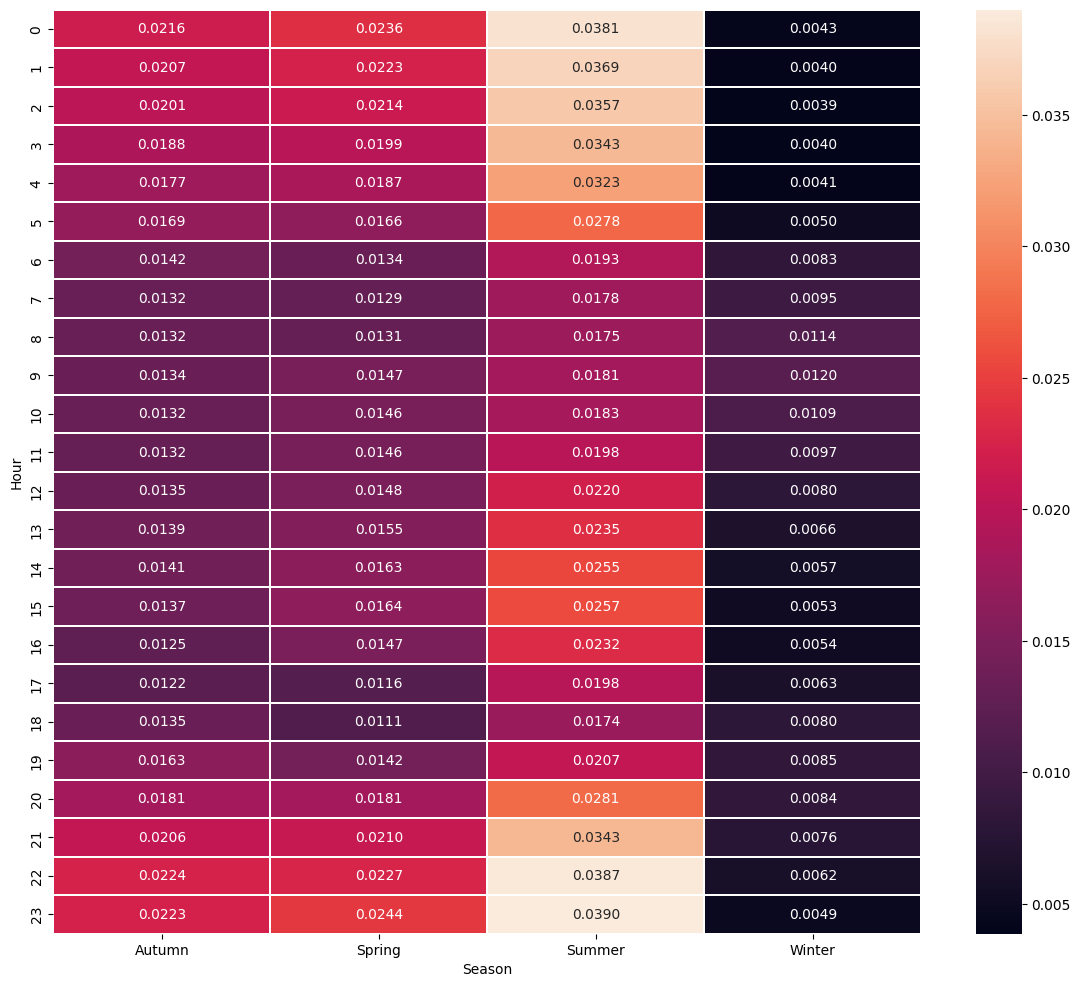

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(table, annot = True, fmt = ".4f", linewidth = 0.2 ); # 

In [13]:
# Extracting Night and Day time according to season
df.loc[((df["Hour"] > 7) & (df['Hour'] < 18)) & (df['Season']=='Winter'), 'Time'] = 'Day' 
df.loc[((df["Hour"] > 5) & (df['Hour'] < 19)) & (df['Season']=='Spring'), 'Time'] = 'Day' 
df.loc[((df["Hour"] > 5) & (df['Hour'] < 20)) & (df['Season']=='Summer'), 'Time'] = 'Day' 
df.loc[((df["Hour"] > 6) & (df['Hour'] < 18)) & (df['Season']=='Autumn'), 'Time'] = 'Day' 
df.loc[((df["Hour"] <= 7) | (df['Hour'] >= 18)) & (df['Season']=='Winter'), 'Time'] = 'Night'
df.loc[((df["Hour"] <= 5) | (df['Hour'] >= 19)) & (df['Season']=='Spring'), 'Time'] = 'Night' 
df.loc[((df["Hour"] <= 5) | (df['Hour'] >= 20)) & (df['Season']=='Summer'), 'Time'] = 'Night' 
df.loc[((df["Hour"] <= 6) | (df['Hour'] >= 18)) & (df['Season']=='Autumn'), 'Time'] = 'Night' 
df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time
0,2019-05-01 00:00:00,0.017,252.419998,1.32,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,0,2,00:00:00,Spring,Night
1,2019-05-01 00:03:00,0.016,251.759995,1.27,50.009998,MH01,2019-05-01,2019,5,18,1,121,2,2,0,3,2,00:03:00,Spring,Night
2,2019-05-01 00:06:00,0.016,250.259995,1.27,50.000000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,6,2,00:06:00,Spring,Night
3,2019-05-01 00:09:00,0.016,250.330002,1.27,50.029999,MH01,2019-05-01,2019,5,18,1,121,2,2,0,9,2,00:09:00,Spring,Night
4,2019-05-01 00:12:00,0.015,250.960007,1.27,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,12,2,00:12:00,Spring,Night


In [14]:
def categorize_hour(Hour):
    if 0 <= Hour <= 6:
        return 'Midnight'
    elif 7 <= Hour <= 12:
        return 'Morning'
    elif 13 <= Hour <= 18:
        return 'Afternoon'
    elif 19 <= Hour <= 23:
        return 'Night'
    else:
        return 'Unknown'

# Apply the categorization function to the 'Hour' column and create a new column 'Time_Category'
df['Time_Category'] = df['Hour'].apply(categorize_hour)
df.head()

,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Smart_Meter,Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time,Time_Category
0,2019-05-01 00:00:00,0.017,252.419998,1.32,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,0,2,00:00:00,Spring,Night,Midnight
1,2019-05-01 00:03:00,0.016,251.759995,1.27,50.009998,MH01,2019-05-01,2019,5,18,1,121,2,2,0,3,2,00:03:00,Spring,Night,Midnight
2,2019-05-01 00:06:00,0.016,250.259995,1.27,50.000000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,6,2,00:06:00,Spring,Night,Midnight
3,2019-05-01 00:09:00,0.016,250.330002,1.27,50.029999,MH01,2019-05-01,2019,5,18,1,121,2,2,0,9,2,00:09:00,Spring,Night,Midnight
4,2019-05-01 00:12:00,0.015,250.960007,1.27,50.020000,MH01,2019-05-01,2019,5,18,1,121,2,2,0,12,2,00:12:00,Spring,Night,Midnight


In [15]:
df_humi = df.groupby(["Electricity_consumption(kWh)", "Year", "Season" ,"Time_Category"], as_index = False)["Electricity_consumption(kWh)"].mean().sort_values(by="Season", ascending = False)
df_humi 

,Year,Season,Time_Category,Electricity_consumption(kWh)
5152,2019,Winter,Night,0.166
3914,2019,Winter,Afternoon,0.122
3916,2019,Winter,Morning,0.122
3917,2019,Winter,Night,0.122
3930,2020,Winter,Afternoon,0.122
...,...,...,...,...
3507,2020,Autumn,Night,0.109
3520,2019,Autumn,Afternoon,0.110
3521,2019,Autumn,Midnight,0.110
3522,2019,Autumn,Morning,0.110


In [16]:
table2 = pd.pivot_table(df_humi, values =["Electricity_consumption(kWh)"], index = ["Season","Year","Time_Category"])
table2

Electricity_consumption(kWh)
Season Year Time_Category                              
Autumn 2019 Afternoon                          0.128867
            Midnight                           0.124648
            Morning                            0.097026
            Night                              0.132534
       2020 Afternoon                          0.097560
            Midnight                           0.106196
            Morning                            0.093275
            Night                              0.122939
Spring 2019 Afternoon                          0.106295
            Midnight                           0.119093
            Morning                            0.080062
            Night                              0.113598
       2020 Afternoon                          0.073061
            Midnight                           0.074669
            Morning                            0.085571
            Night                              0.082928
Summer 2019 Afternoon                          0.133925
            Midnight                           0.137562
            Morning                            0.121407
            Night                              0.140270
       2020 Afternoon                          0.106632
            Midnight                           0.116607
            Morning                            0.100925
            Night                              0.109805
Winter 2019 Afternoon                          0.072945
            Midnight                           0.079173
            Morning                            0.090039
            Night                              0.074865
       2020 Afternoon                          0.071782
            Midnight                           0.094635
            Morning                            0.099031
            Night                              0.078686

In [17]:
# Aggregating multiple columns
df[['Electricity_consumption(kWh)', 'Avg_Voltage(Volt)',
       'Avg_Current(Amp)', 'Freq(Hz)']].agg(['sum','max','mean','std','skew','kurt'])

,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz)
sum,130753.335938,1.610118e+09,1.260737e+07,3.331735e+08
max,0.299000,6.545000e+02,4.416000e+01,5.703300e+02
mean,0.017794,2.191163e+02,1.715701e+00,4.534062e+01
std,0.025542,7.276048e+01,2.302983e+00,1.454188e+01
skew,2.938900,-2.486526e+00,2.736485e+00,-2.789580e+00
kurt,10.597254,4.723465e+00,9.600440e+00,6.054224e+00


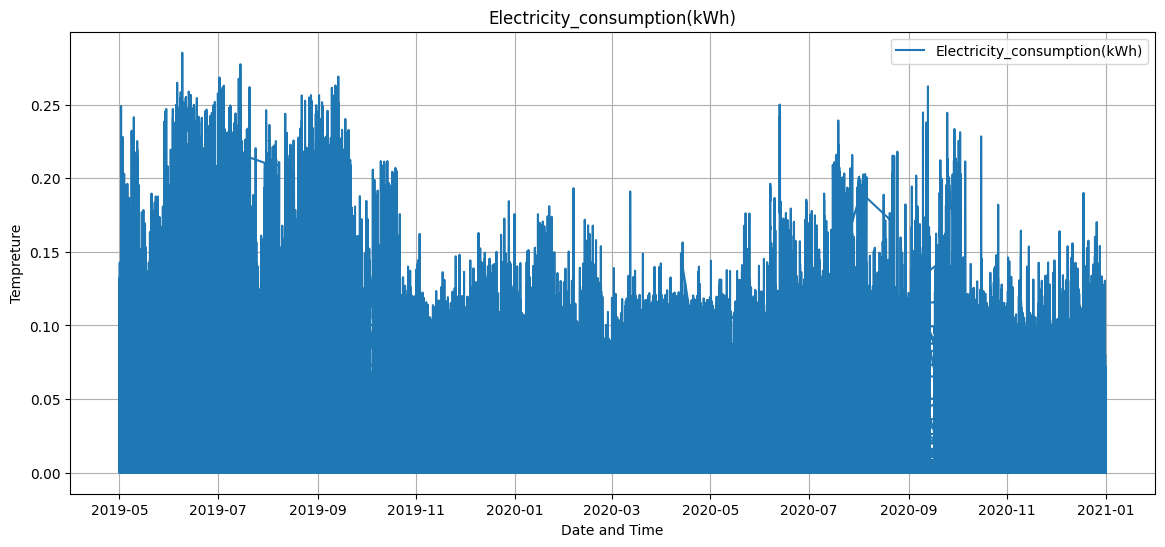

In [18]:
_, ax = plt.subplots(1, 1, figsize=(14, 6))

ax.plot(df.Timestamp,
        df['Electricity_consumption(kWh)'].rolling(window=5).mean(),
        label='Electricity_consumption(kWh)'
       )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Electricity_consumption(kWh)')
plt.xlabel('Date and Time')
plt.ylabel('Tempreture')
plt.show()

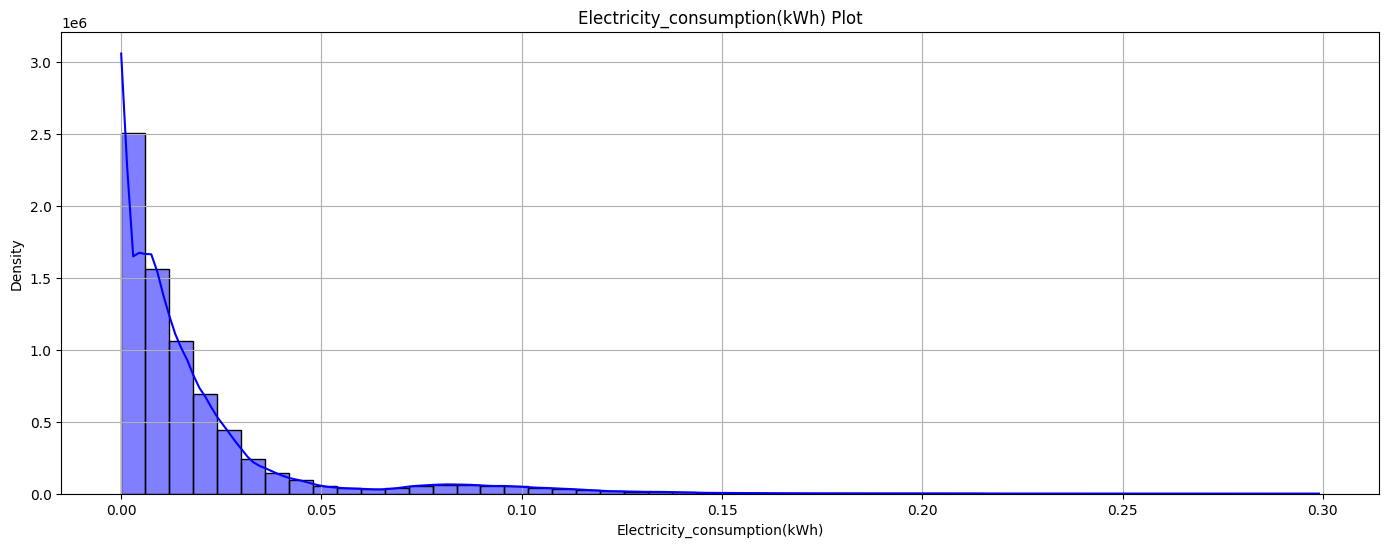

In [19]:
plt.figure(figsize=(17,6))
sns.histplot(df['Electricity_consumption(kWh)'], bins=50, color='blue', kde=True)
plt.title('Electricity_consumption(kWh) Plot')
plt.xlabel('Electricity_consumption(kWh)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

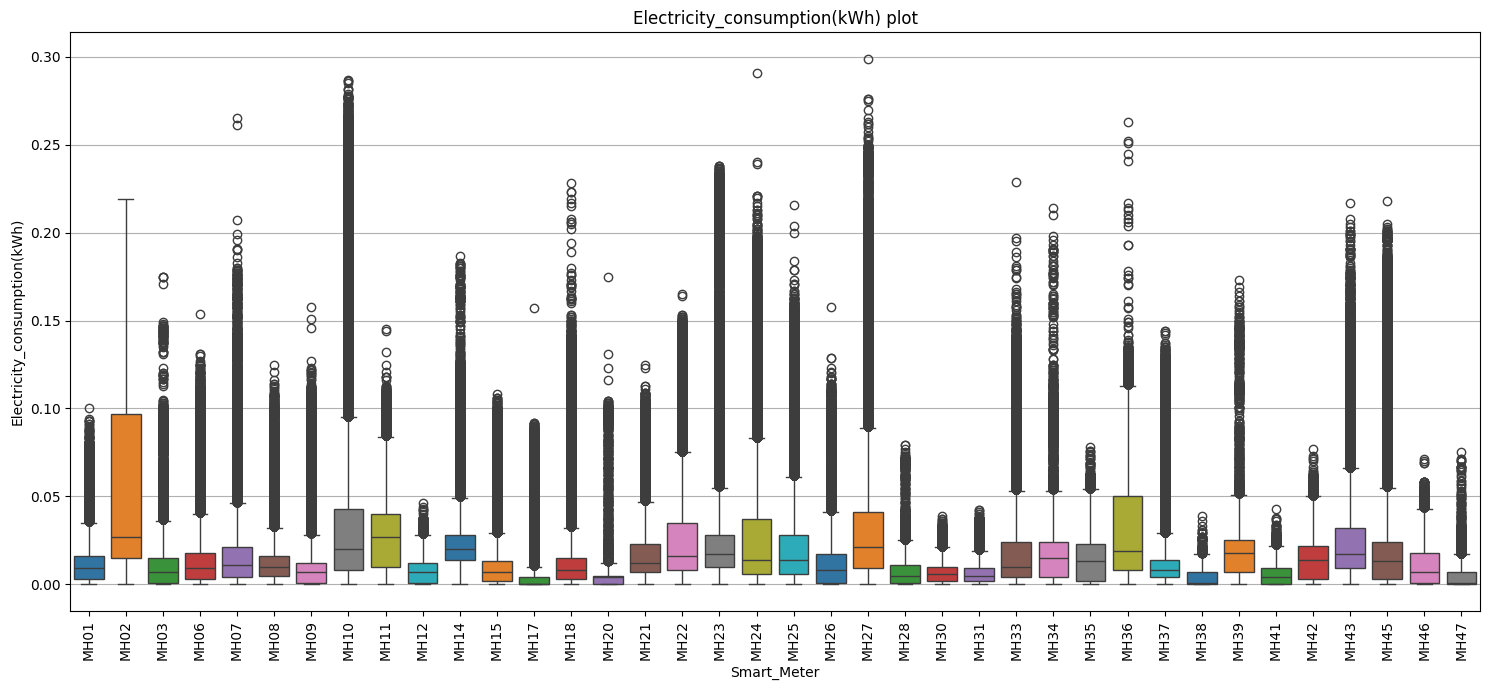

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Smart_Meter'], y=df['Electricity_consumption(kWh)'], palette="tab10")
plt.xticks(rotation=90)
plt.title('Electricity_consumption(kWh) plot')
plt.xlabel('Smart_Meter')
plt.ylabel('Electricity_consumption(kWh)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Figure size 1500x700 with 0 Axes>

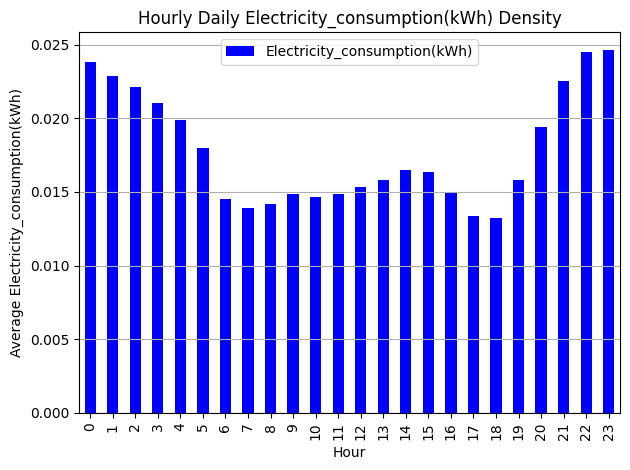

In [23]:
plt.figure(figsize=(15,7))
hourly_yield = df.groupby(df['Hour'])[['Electricity_consumption(kWh)']].mean()
hourly_yield.plot(kind='bar', color='blue')
plt.title('Hourly Daily Electricity_consumption(kWh) Density')
plt.xlabel('Hour')
plt.ylabel('Average Electricity_consumption(kWh)')
plt.grid(True, axis='y')
plt.tight_layout()

In [24]:
grouped_Electricity_consumption= df.groupby('Smart_Meter')['Electricity_consumption(kWh)'].mean()
grouped_Electricity_consumption.to_frame()

,Electricity_consumption(kWh)
Smart_Meter,
MH01,0.010443
MH02,0.047648
MH03,0.010220
MH06,0.012518
MH07,0.021529
MH08,0.010996
MH09,0.008425
MH10,0.036082
MH11,0.026904


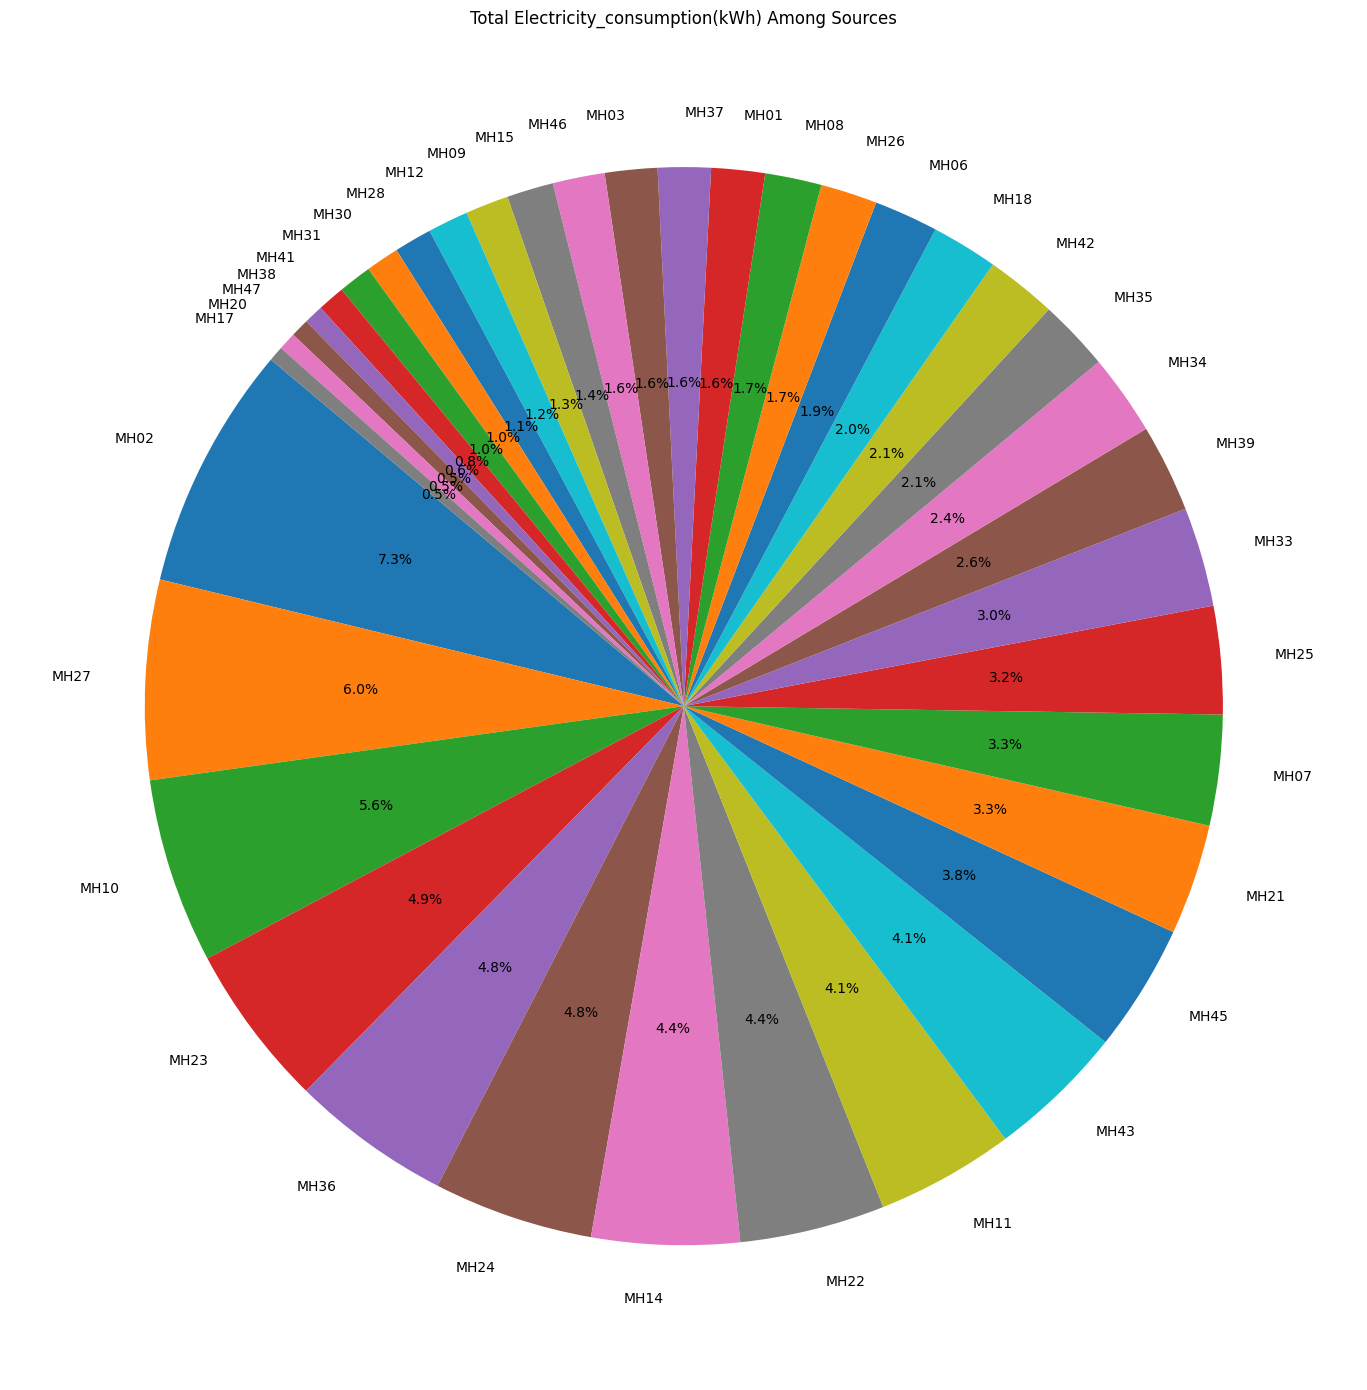

In [25]:
grouped_Electricity_consumption= df.groupby('Smart_Meter')['Electricity_consumption(kWh)'].mean()

plt.figure(figsize=(14,14))
grouped_Electricity_consumption.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Electricity_consumption(kWh) Among Sources')
plt.ylabel('')
plt.tight_layout()
plt.show()

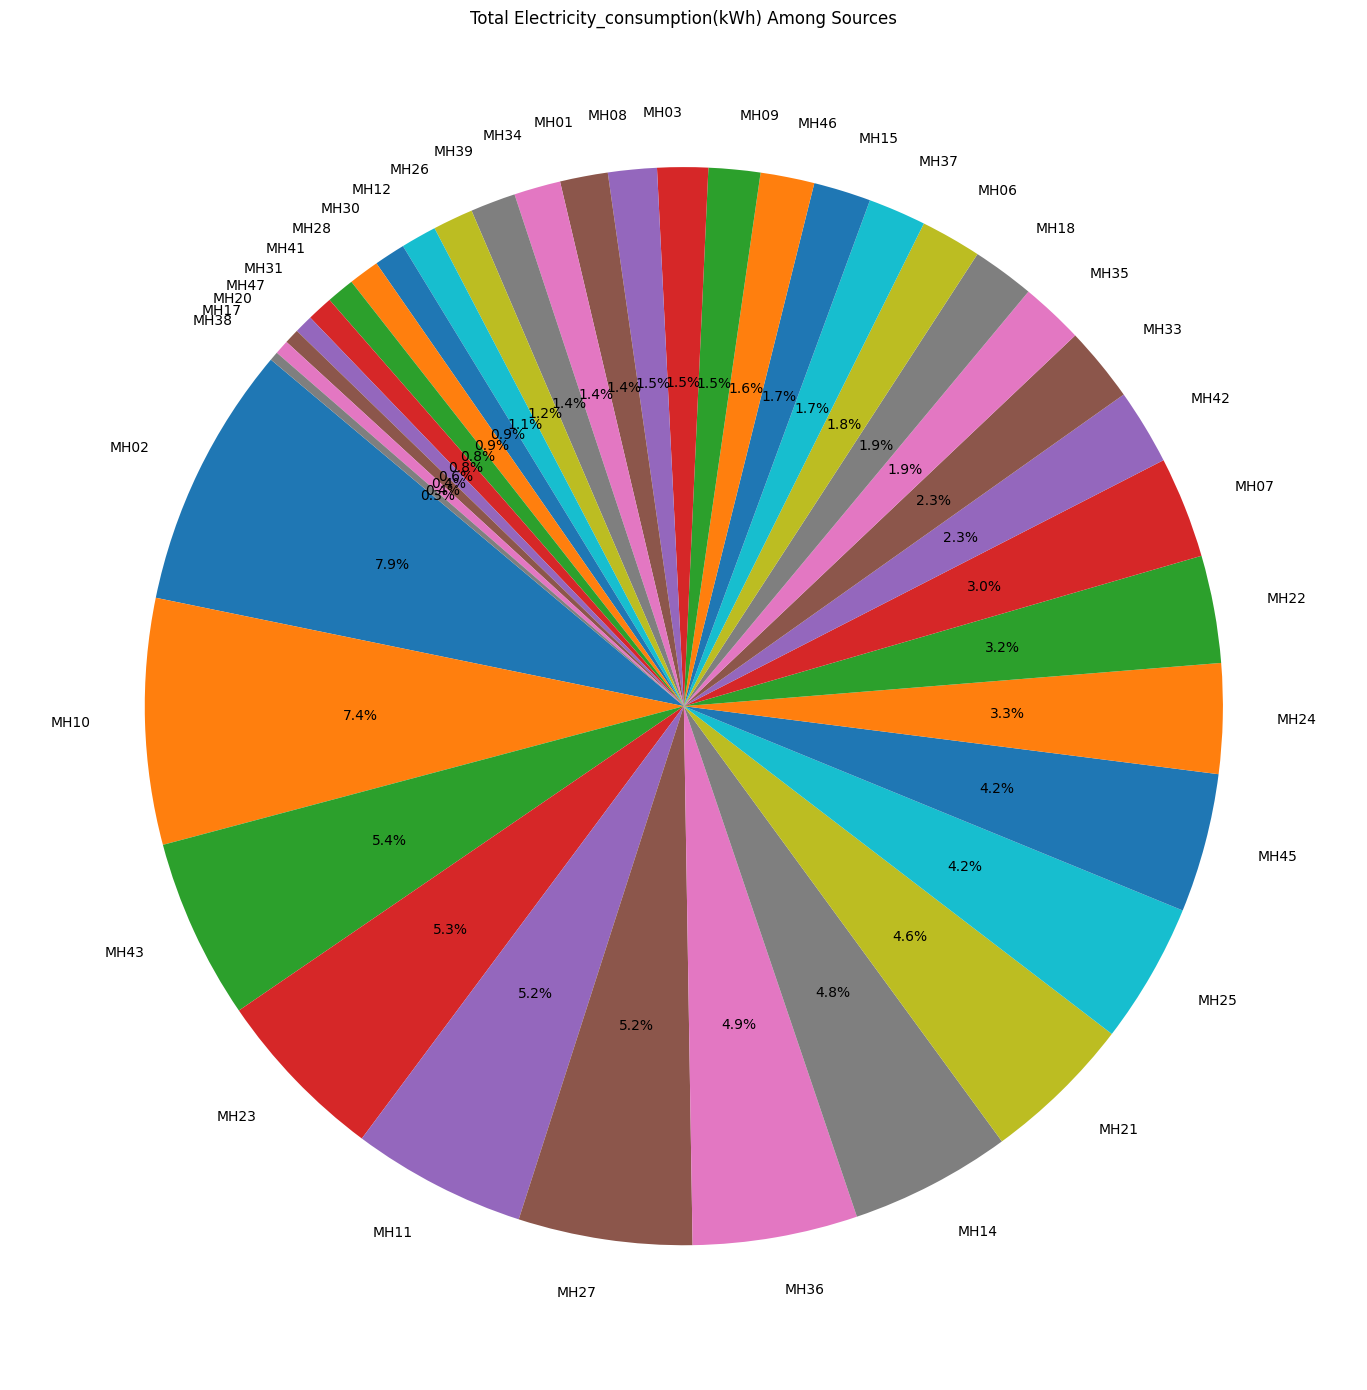

In [26]:
grouped_Electricity_consumption= df.groupby('Smart_Meter')['Electricity_consumption(kWh)'].sum()

plt.figure(figsize=(14,14))
grouped_Electricity_consumption.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Electricity_consumption(kWh) Among Sources')
plt.ylabel('')
plt.tight_layout()
plt.show()